# Simple Example of calculating Stark maps

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pairinteraction.backend.double as pi

In [2]:
pi.initialize_global_database(download_missing=True)

[2025-01-20 18:55:56.210 1838587] [info] [Database.cpp:209] Accessing database repository path: /repos/pairinteraction/database-sqdt/releases/latest
[2025-01-20 18:55:56.371 1838587] [info] [Database.cpp:248] Using cached overview of available tables.
[2025-01-20 18:55:56.372 1838587] [info] [Database.cpp:209] Accessing database repository path: /repos/pairinteraction/database-mqdt/releases/latest
[2025-01-20 18:55:56.541 1838587] [info] [Database.cpp:248] Using cached overview of available tables.
[2025-01-20 18:55:57.095 1838587] [info] [Database.cpp:304] Availability of database tables for species and Wigner 3j symbols:
[2025-01-20 18:55:57.095 1838587] [info] [Database.cpp:306] * Yb173_mqdt (locally available: false, up to date: false, fully downloaded: false)
[2025-01-20 18:55:57.095 1838587] [info] [Database.cpp:306] * Yb171_mqdt (locally available: false, up to date: false, fully downloaded: false)
[2025-01-20 18:55:57.095 1838587] [info] [Database.cpp:306] * Sr88_mqdt (locally 

In [3]:
ket = pi.KetAtom("Rb", n=60, l=0, m=0.5)
print(f"Ket of interest: {ket}")
ket_energy = ket.get_energy(unit="GHz")
basis = pi.BasisAtom("Rb", n=(ket.n - 3, ket.n + 3), l=(0, 62), m=(0.5, 0.5))
print(f"Number of basis states: {basis.number_of_states}")

electric_fields = np.linspace(0, 8, 50)
systems = [pi.SystemAtom(basis).set_electric_field([0, 0, e], unit="V/cm") for e in electric_fields]

# Diagonalize the systems in parallel
pi.diagonalize(systems, diagonalizer="Eigen", sort_by_energy=True)

eigenvalues = np.array([system.get_eigenvalues(unit="GHz") for system in systems])
overlaps = np.array([system.get_eigenbasis().get_overlaps(ket) for system in systems])

Ket of interest: Rb:60,S_1/2,1/2
Number of basis states: 833


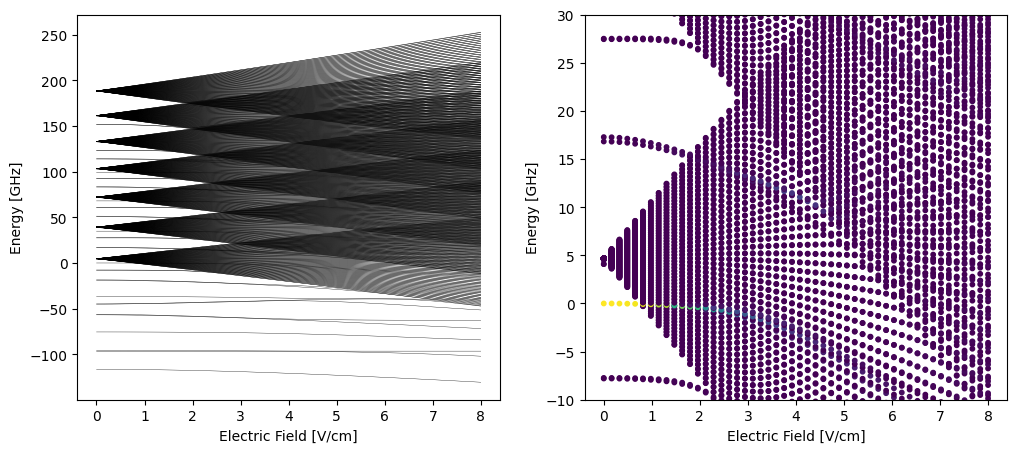

In [4]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax in axs:
    ax.set_xlabel("Electric Field [V/cm]")
    ax.set_ylabel("Energy [GHz]")

axs[0].plot(electric_fields, eigenvalues - ket_energy, c="k", lw=0.25)

axs[1].scatter(np.repeat(electric_fields, eigenvalues.shape[1]), eigenvalues - ket_energy, c=overlaps, s=10)
axs[1].set_ylim(-10, 30)

plt.show()